<a href="https://colab.research.google.com/github/zhaishu2008/UTS_ML2019_ID12450108/blob/master/KNN_HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# encoding: utf-8

Step 1: Import required packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
from sklearn import svm # This pacakge is used for svm classification
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline
import cv2
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)

## **Connect to My Drive**



In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [0]:
cd /content/gdrive/My Drive/data/assessment !

/content/gdrive/My Drive/data/assessment !


In [0]:
ls

 ANN.ipynb
'Handcrafted Feature Extraction_ Part-1.ipynb'
'Handcrafted Feature Extraction_ Part-1-Solution.ipynb'
'Handcrafted Feature Extraction_ Part-2-Solution.ipynb'
 KNN-HOG.ipynb
 knn-LBP.ipynb
 LogisticRegression-NeuralNetwork-Part-1-Solution.ipynb
 Mnist/
'Python-additional-warmup-solution(1).ipynb'
 SVM-HOG.ipynb
 SVM-LBP.ipynb
 t10k-images-idx3-ubyte/
 t10k-images-idx3-ubyte.gz
 t10k-labels-idx1-ubyte/
 t10k-labels-idx1-ubyte.gz
 train-images-idx3-ubyte/
 train-images-idx3-ubyte.gz
 train-labels-idx1-ubyte/
 train-labels-idx1-ubyte.gz
 Week3-Lab2-EdgeDetection-Solution.ipynb
 Week3-Lab2-MachineLearning-Solution.ipynb
 Week5-LogisticRegression-NeuralNetwork-Part-2-Solution.ipynb
'Week6-ConvolutionalNeuralNetworks(CNNs)-Solution.ipynb'


Use the utility function to load the dataset and split it into train and test.

In [0]:
X_train, y_train = load_mnist('/content/gdrive/My Drive/data/assessment !', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/data/assessment !', kind='t10k')
# initialize the label names from Fashion MNIST github repository

labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [0]:
np.shape(X_train)
np.shape(X_test)

(10000, 784)

Reshaping the feature vector back into the 28X28 image

In [0]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


Visualization of Dataset

top
trouser
sneaker
dress


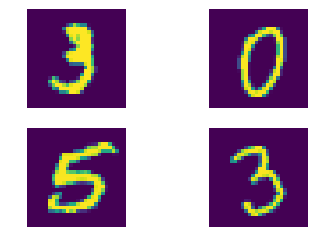

In [0]:
# view few images and print its corresponding label
img_index = 10
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = 1000
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,3)
ax2.axis('off')
img_index = 20000
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,4)
ax2.axis('off')
img_index = 30000
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

Histogram-of-Oriented Gradient (HOG) feature extraction

In [0]:
# initialize the data matrix and labels
print("Extracting features from training dataset...")
data_train = []
labels_train = []

# loop over the training images
for img_index in range(len(X_train)):
  # load the image, and extract HOG features
  image = (X_train[img_index])
  #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  H = feature.hog(image, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
 
  # update the data and labels
  data_train.append(H)
  labels_train.append(y_train[img_index])


Extracting features from training dataset...


In [0]:
img_index

59999

KNN Train

Step-1: Create the training and test dataset

In [0]:
X,y = data_train,labels_train

In [0]:
# Divided the dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.7,random_state=100)

In [0]:
clf=KNeighborsClassifier(n_neighbors=1)

In [0]:
# Fit the model, clf, to the training set.
clf.fit(data_train,labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [0]:
# Calculate the predictions for y_test with the clf model
y_predicted=clf.predict(X_test)
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [8 6 6 ... 4 1 9]


In [0]:
print("Test set Accuracy: {:.2f}".format(clf.score(X_test,y_test)))

Test set Accuracy: 1.00


In [0]:
print(metrics.confusion_matrix(y_test, y_predicted))

[[4225    0    0    0    0    0    0    0    0    0]
 [   0 4251    0    0    0    0    0    0    0    0]
 [   0    0 4254    0    0    0    0    0    0    0]
 [   0    0    0 4237    0    0    0    0    0    0]
 [   0    0    0    0 4221    0    0    0    0    0]
 [   0    0    0    0    0 4166    0    0    0    0]
 [   0    0    0    0    0    0 4136    0    0    0]
 [   0    0    0    0    0    0    0 4179    0    0]
 [   0    0    0    0    0    0    0    0 4166    0]
 [   0    0    0    0    0    0    0    0    0 4165]]


In [0]:
## Hint use clf.score()
acc_train = clf.score(X_train, y_train)
print('Train set accuracy: ', acc_train)

## Hint use clf.score()
acc_test = clf.score(X_test, y_test)
print('Test set accuracy: ', acc_test)

Train set accuracy:  1.0
Test set accuracy:  1.0
